In [157]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns 

In [158]:
# Load a picture to check the shape and indicate the path to the data folder
img = cv2.imread(r"C:\Users\Dell\Downloads\archive (1)\data\SeaLake_1.jpg")
image_dir = "C:/Users/Dell/Downloads/archive (1)/data"

img.shape 

(64, 64, 3)

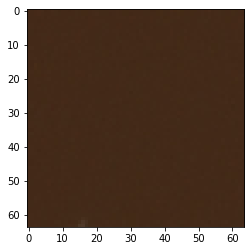

In [159]:
plt.imshow(img)

In [160]:
img_shape = img.shape
IMG_SIZE = img.shape[0]
CHANNELS = img_shape[2]
BATCH_SIZE = 64


print(IMG_SIZE )
print(CHANNELS )
print(BATCH_SIZE)

64
3
64


In [161]:
# Split data into train and test 

train_data = tf.keras.preprocessing.image_dataset_from_directory(image_dir,
                                                                 image_size = (64,64),
                                                                 label_mode = "categorical",
                                                                 batch_size= 32,
                                                                 validation_split = 0.20,
                                                                 seed = 42,
                                                                 subset = "training"
                                                                 )

test_data = tf.keras.preprocessing.image_dataset_from_directory(image_dir,
                                                                image_size = (64,64),
                                                                label_mode = "categorical",
                                                                batch_size = 32,
                                                                seed = 42,
                                                                validation_split = 0.20,
                                                                subset = "validation"
                                                                )
#Checking class names 
class_names = train_data.class_names
class_names


Found 5631 files belonging to 4 classes.
Using 4505 files for training.
Found 5631 files belonging to 4 classes.
Using 1126 files for validation.


['cloudy', 'desert', 'green_area', 'water']

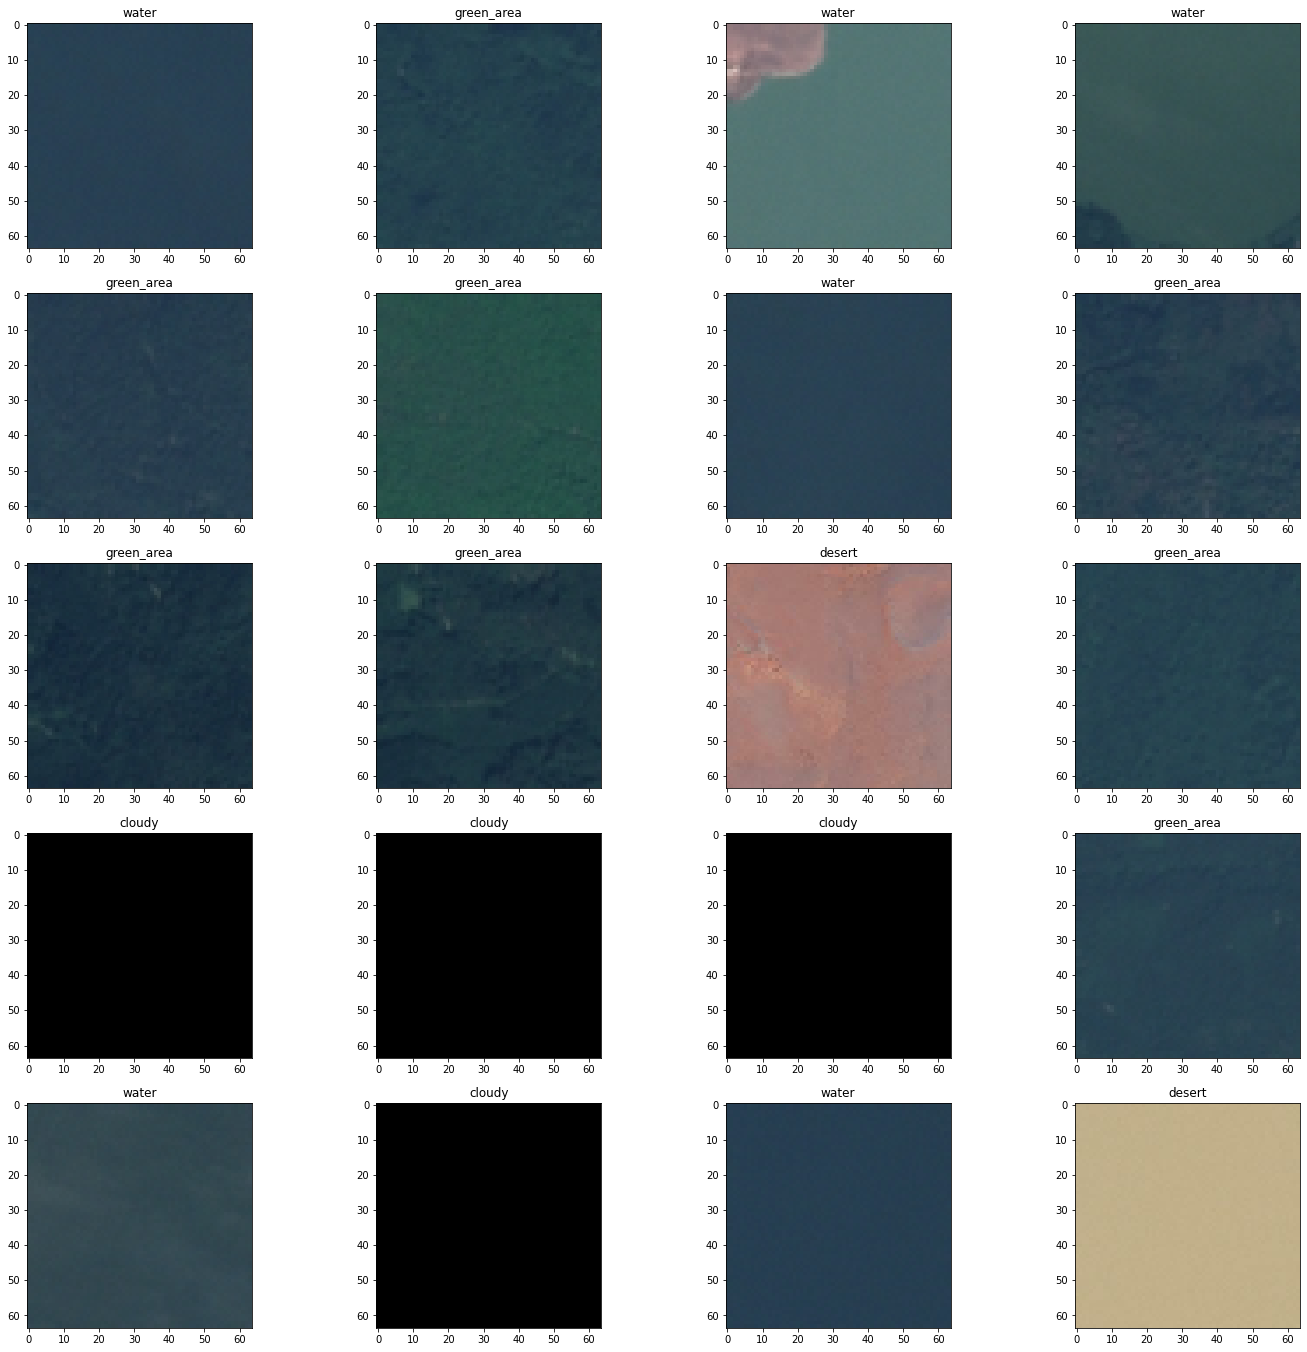

In [168]:
#Displaying the train data sample 

plt.figure(figsize=(24,24))

for image, label in train_data.take(1):
  
  for i in range(20):
    plt.subplot(5,4,i+1)
    plt.imshow(image[i].numpy().astype("uint8"))
    plt.title(class_names[tf.argmax(label[i])]) 
  

In [162]:
#model inclusion and variables notation 

input_shape = (64, 64, 3)
n_classes =4
model = Sequential()


In [163]:
# leyers of Neural network 

model.add(Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,  kernel_size = (3,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64,  kernel_size = (3,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(n_classes, "softmax"))

In [164]:
#Compilation of the NN model 

model.compile(loss="categorical_crossentropy", 
              optimizer="adam", 
              metrics=["accuracy"])

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 2, 2, 64)         

In [165]:
#Learning a neural network

early_stopping = EarlyStopping(monitor="accuracy", patience=10)

model.fit(train_data,    validation_data = test_data, 
          epochs=50, 
          callbacks=[early_stopping]
          )



Epoch 1/50
141/141 [==============================] - 36s 239ms/step - loss: 3.1808 - accuracy: 0.6938 - val_loss: 0.1469 - val_accuracy: 0.9565
Epoch 2/50
141/141 [==============================] - 11s 77ms/step - loss: 0.1950 - accuracy: 0.9205 - val_loss: 0.3330 - val_accuracy: 0.8552
Epoch 3/50
141/141 [==============================] - 12s 82ms/step - loss: 0.1389 - accuracy: 0.9430 - val_loss: 0.1032 - val_accuracy: 0.9707
Epoch 4/50
141/141 [==============================] - 11s 79ms/step - loss: 0.0824 - accuracy: 0.9695 - val_loss: 0.2153 - val_accuracy: 0.9014
Epoch 5/50
141/141 [==============================] - 11s 78ms/step - loss: 0.1064 - accuracy: 0.9628 - val_loss: 0.0972 - val_accuracy: 0.9716
Epoch 6/50
141/141 [==============================] - 11s 78ms/step - loss: 0.1020 - accuracy: 0.9566 - val_loss: 0.0775 - val_accuracy: 0.9787
Epoch 7/50
141/141 [==============================] - 11s 79ms/step - loss: 0.1113 - accuracy: 0.9598 - val_loss: 0.2469 - val_accuracy

In [166]:
model.evaluate(test_data)


36/36 [==============================] - 2s 35ms/step - loss: 0.0877 - accuracy: 0.9796


[0.08766299486160278, 0.9795737266540527]

In [169]:
model.save(r"C:\Users\Dell\Downloads\archive (1)\data")


INFO:tensorflow:Assets written to: C:\Users\Dell\Downloads\archive (1)\data\assets
